In [1]:
# notebook import

from ipynb.fs.full.data_processing import *

In [40]:
# list of colors corresponding to specific wells used in figures
colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'yellowgreen', 'limegreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink']


In [50]:
def prepare_animation(bar_container, well, ref, bins):

    def animate(t):
        # simulate new data coming in
        data = (experiment_dict[well].loc[experiment_dict[well][timestep_ref] == t+1])[ref]
        plt.hist(data, bins=bins, label=t)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate



In [51]:
def main():
    
    global bin_edges_dict
    bin_edges_dict = create_bin_edges_dict()
    
    for name, ref, color in zip(feature_name_list, feature_ref_list, colors):
        if name != 'area':
            
            bins = bin_edges_dict[name]
            
            for well in well_id_list:
            
                data = (experiment_dict[well].loc[experiment_dict[well][timestep_ref] == 1])[ref]
                n, _ = np.histogram(data, bins)
                
                fig, ax = plt.subplots()
                _, _, bar_container = ax.hist(data, gfp_bins, lw=1, ec=color, fc=color)
                
                
                
                ax.set_ylim(top=100)  # set safe limit to ensure that all data is visible.
                
                plt.title(f'{proper_feature[name]} distribution through time ({well})')
                plt.xlabel(f'{proper_feature[name]}')
                plt.ylabel('Density')
                
                ani = animation.FuncAnimation(fig, prepare_animation(bar_container, well, ref, bins), len(timestep_list), repeat=False, blit=True)
                
                video = ani.to_html5_video()
  
                # embedding for the video
                html = display.HTML(video)

                # draw the animation
                display.display(html)

                writervideo = animation.FFMpegWriter(fps=60)
                ani.save(results_fpath + f'animated_histograms/{name}_{well}.mp4', dpi=300, writer=writervideo)

                plt.close()
                

In [ ]:
main()

In [37]:
# histogram our data with numpy
#data = np.random.randn(1000)
#n, _ = np.histogram(data, HIST_BINS)
#HIST_BINS = np.linspace(-4, 4, 100)
bin_edges_dict = create_bin_edges_dict()
gfp_bins = bin_edges_dict['gfp']

data = (experiment_dict['01'].loc[experiment_dict['01'][timestep_ref] == 1])['mean_F_C2']
n, _ = np.histogram(data, gfp_bins)

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, gfp_bins,
                              fc="green", alpha=0.5)
ax.set_ylim(top=100)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 431,
                              repeat=False, blit=True)
video = ani.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)

writervideo = animation.FFMpegWriter(fps=60)
anim.save('increasingStraightLine.mp4', writer=writervideo)

plt.close()

AttributeError: 'FuncAnimation' object has no attribute 'FFMpegWriter'

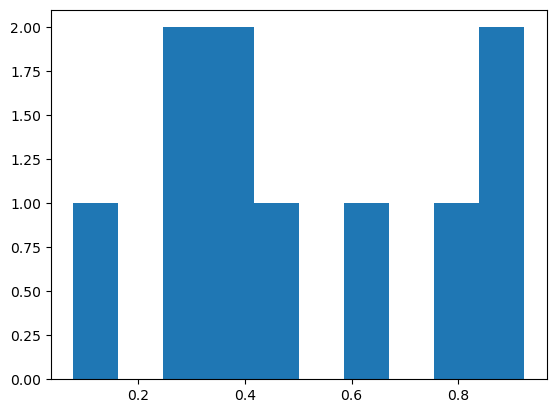

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

anim = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
writervideo = anim.FFMpegWriter(fps=60)
anim.save('increasingStraightLine.mp4', writer=writervideo)
plt.close()

In [ ]:
bin_edges_dict = create_bin_edges_dict()

for feature in feature_name_list:
    hist_bins = bin_edges_dict[feature]
    

In [16]:
bin_edges_dict = create_bin_edges_dict()
gfp_bins = bin_edges_dict['gfp']


In [22]:

# initializing a figure
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(min(gfp_bins), max(gfp_bins)),  ylim=(0, 1))
  
# initializing a line variable
line, = axis.plot([], [], lw=3)
  
def animate(t):
    val_list = (experiment_dict['01'].loc[experiment_dict['01'][timestep_ref] == t+1])['mean_F_C2']
    plt.hist(val_list, bins=gfp_bins, density=True)
    return
  
  
anim = animation.FuncAnimation(fig, animate, frames=10)

fig.suptitle('Sine wave plot', fontsize=14)
  
# converting to an html5 video
video = anim.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)

writervideo = animation.FFMpegWriter(fps=60)
anim.save('increasingStraightLine.mp4', writer=writervideo)

plt.close()